In [34]:
# 경고무시
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [35]:
# load library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

In [42]:
# load data
online_data = pd.read_csv("C:/nh/선물세트.csv")
online_data.head()

C:\Users\CPB06GameN\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,매출일,매출처명,품목명,규격명,매출수량,매출단가,공급금액
0,2015-03-02,(인터넷하나로클럽),웰빙혼합7곡1kg(박스형),1Kg,200.0,5000.0,1000000.0
1,2015-03-02,(인터넷하나로클럽),웰빙혼합7곡2kg(박스형),2kg,20.0,10000.0,200000.0
2,2015-03-02,(인터넷하나로클럽),웰빙혼합7곡500g(진공),500g,80.0,2500.0,200000.0
3,2015-03-02,(인터넷하나로클럽),웰빙혼합7곡2kg(박스형),2kg,18.0,14400.0,259200.0
4,2015-03-02,(인터넷하나로클럽),웰빙혼합7곡2kg(박스형),2kg,1.0,14500.0,14500.0


In [43]:
# 데이터 shape 파악
online_data.shape

(997464, 7)

In [44]:
# 데이터 통계량 파악
online_data.describe()

,매출수량,매출단가,공급금액
count,3118.000000,3.118000e+03,3.118000e+03
mean,88.395125,1.796526e+04,4.469526e+05
std,1171.118978,4.038355e+04,3.887807e+06
min,-1200.000000,2.490000e+03,-5.448000e+07
25%,1.000000,1.387000e+04,2.300000e+04
50%,3.000000,1.500000e+04,6.000000e+04
75%,20.000000,2.200000e+04,2.200000e+05
max,33150.000000,2.206680e+06,1.040640e+08


In [47]:
# 결측치 파악
online_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997464 entries, 0 to 997463
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매출일     3118 non-null   object 
 1   매출처명    3118 non-null   object 
 2   품목명     3118 non-null   object 
 3   규격명     3118 non-null   object 
 4   매출수량    3118 non-null   float64
 5   매출단가    3118 non-null   float64
 6   공급금액    3118 non-null   float64
dtypes: float64(3), object(4)
memory usage: 53.3+ MB


In [48]:
# 통계량 파악
online_data['매출수량'].describe()

count     3118.000000
mean        88.395125
std       1171.118978
min      -1200.000000
25%          1.000000
50%          3.000000
75%         20.000000
max      33150.000000
Name: 매출수량, dtype: float64

매출수량의 최소값은 -1200개, 평균 88개, 최대값이 33150개인것을 보아 outlier 데이터가 속해있는 것으로 판단됨

In [49]:
online_data['공급금액'].describe()

count    3.118000e+03
mean     4.469526e+05
std      3.887807e+06
min     -5.448000e+07
25%      2.300000e+04
50%      6.000000e+04
75%      2.200000e+05
max      1.040640e+08
Name: 공급금액, dtype: float64

# Online_data Segmentation
## - 많이 팔렸던 매출일(매출일, 매출수량)
## - 가장 많은 매출처(매출처명, 매출수량, 공급금액)
## - 판매량 많은 상품(품목명, 규격명, 매출수량, 공급금액)

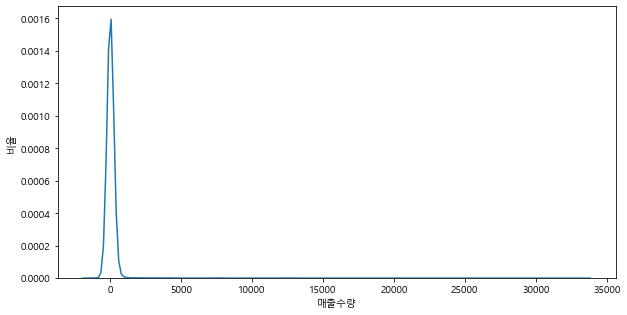

In [57]:
import seaborn as sns 
# 빈 캔버스 사이즈 지정
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(online_data['매출수량']) 
kde.set_xlabel("매출수량")
kde.set_ylabel("비율")

# 다 그려진 캔버스 보여주기
plt.show()

C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


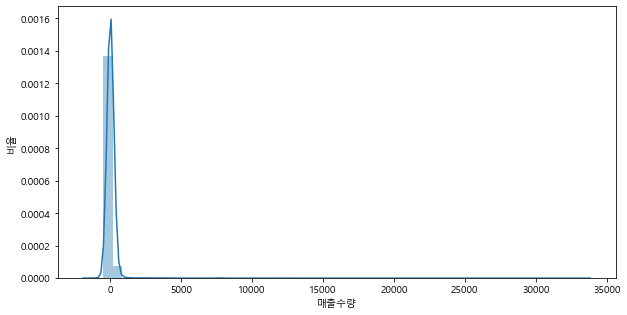

In [59]:
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(online_data['매출수량']) # kde=False를 넣어보자
dist.set_xlabel("매출수량")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

In [60]:
# skewness and kurtosis
print("Skewness: %f" % online_data['매출수량'].skew())
print("Kurtosis: %f" % online_data['매출수량'].kurt())

Skewness: 25.123870
Kurtosis: 663.466601


kewness를 측정한 값 기준으로 -2~+2 고려가능한 수치이지만
skewness가 2를 초과했으므로 positive skew - 변환방법 : square root, cube, log
첨도가 높으므로(Kurtosis > 3) 아웃라이어가 많이 있다.

In [62]:
# 상위 99% 값을 cut_point로 지정_이상치 제거
cut_point = online_data["매출수량"].quantile(0.99)
df_cut=online_data[online_data['매출수량'] < cut_point]

C:\Users\CPB06GameN\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


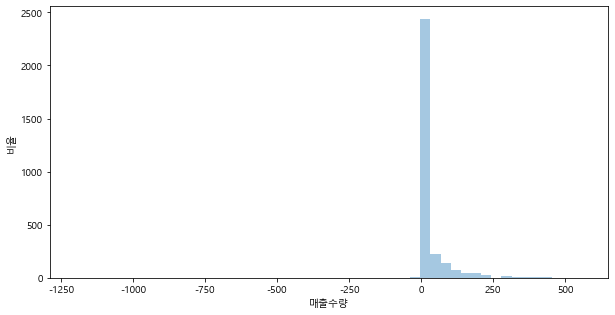

In [63]:
# seaborn의 distplot, shade 연한 하늘색 네모가 histogram
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(df_cut['매출수량'],kde=False) # kde=False
dist.set_xlabel("매출수량")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

# -많이 팔렸던 매출일(매출일, 매출수량) 파악

In [64]:
# 매출일의 빈도표
df_cut['매출일'].value_counts()

2017-07-11    36
2016-09-09    25
2016-09-06    23
2016-09-30    21
2017-07-06    21
              ..
2015-06-22     1
2016-08-02     1
2016-07-13     1
2017-11-16     1
2016-10-17     1
Name: 매출일, Length: 807, dtype: int64

In [75]:
df_cut['매출수량'].describe()
# 평균 28

count    3086.000000
mean       28.188594
std        75.786705
min     -1200.000000
25%         1.000000
50%         3.000000
75%        19.000000
max       560.000000
Name: 매출수량, dtype: float64

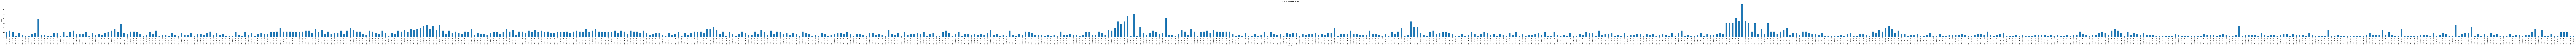

In [66]:
# 날짜순(x축에 따라) 으로 정렬
plt.figure(figsize=(365,5))
df_cut['매출일'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('매출일')
plt.ylabel('count')
plt.title('가장 많이 팔린 매출일 파악')
plt.show()

## 결과
2016-09-01~2016-09-06
2016-09-09
2016-09-30
2017-01-20
2017-01-23
2017-01-31
2017-07-03~07-24

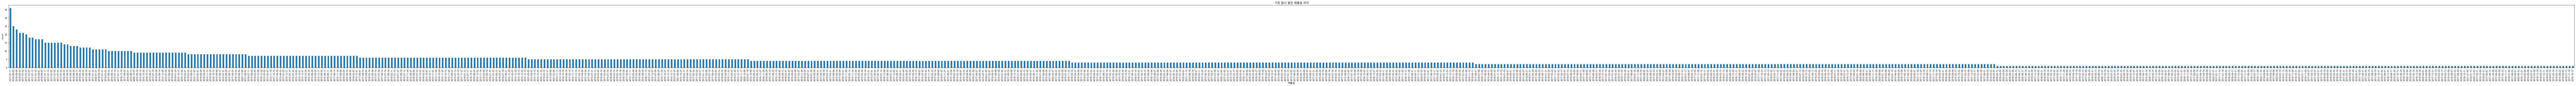

In [76]:
# 빈도가 많은 순으로 정렬
plt.figure(figsize=(200,5))
df_cut['매출일'].value_counts().plot(kind='bar')
plt.xlabel('매출일')
plt.ylabel('count')
plt.title('가장 많이 팔린 매출일 파악')
plt.show() 

# - 가장 많은 매출처(매출처명, 매출수량, 공급금액) 파악

In [79]:
# 매출처
online_data['매출처명'].value_counts()

(인터넷하나로클럽)             2636
이베이코리아 유한책임회사           118
농업회사법인 우리농민살리기(주)       103
대외마케팅                    97
에스케이 플래닛(주)              88
(주)풍년애                   27
에이케이에스앤디(주)AK인터넷쇼핑몰      21
네이버파이낸셜 주식회사             13
(주)에스에스지닷컴                4
대외홈쇼핑                     4
(주)마더스                    2
11번가(주)                   2
헤파이스                      1
(주)우리홈쇼핑                  1
(주)에프앤이샵                  1
Name: 매출처명, dtype: int64

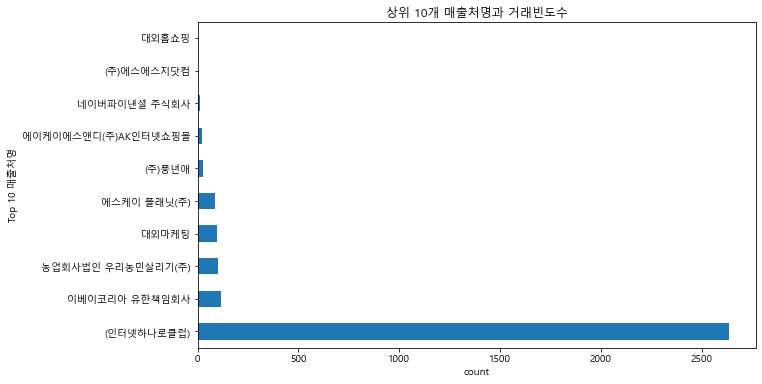

In [84]:
plt.figure(figsize=(10,6))
online_data['매출처명'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 매출처명')
plt.title('상위 10개 매출처명과 거래빈도수')
plt.show()

# - 판매량 많은 상품(품목명, 규격명, 매출수량, 공급금액)

In [81]:
# 매출처
online_data['품목명'].value_counts()

웰빙혼합7곡2kg(박스형)             970
하나가득명품잡곡세트3.6KG(PET)(5)    420
한토래발효잡곡밥6종세트3kg            342
건강가득담은2종세트3kg              329
웰빙혼합7곡500g(진공)             275
건강한잡곡세트3종1.5kg(8)          127
농협오트밀세트(1.2kg)             113
웰빙혼합7곡500g(은행)              99
웰빙혼합7곡500g(생명)              82
햅쌀잡곡3종세트4kg                 74
하나가득프리미엄잡곡4종3kg(4)          73
삼색현미세트(3.6kg)               50
한토래잡곡3종세트(PET)              38
한토래프리미엄잡곡세트2호(PET)          20
자연담은햅쌀잡곡세트4kg(5)            14
웰빙혼합7곡2kg(은행)               12
웰빙혼합7곡1kg(은행)               10
한토래잡곡4종세트(PET)              10
황금비율2kg(10)진공박스형             9
웰빙혼합7곡1kg(박스형)               8
한토래햅쌀잡곡2종세트(PET)             7
한토래우리쌀(진공)2kg                7
한토래햅쌀세트(PET)                 7
한토래잡곡2종세트4kg(PET)            6
더건강한잡곡2.5kg(6)               3
한토래햅쌀잡곡3종세트(PET)             3
하나가득오곡밥1kg(20)               3
한토래 나물밥 꾸러미 12입 210g*12      2
행복가득잡곡세트3종1.5kg(8)           1
쌀가공세트(협회)C                   1
쌀가공세트(농협)A                   1
쌀가공세트(농협)B                   1
쌀가공세트(협회

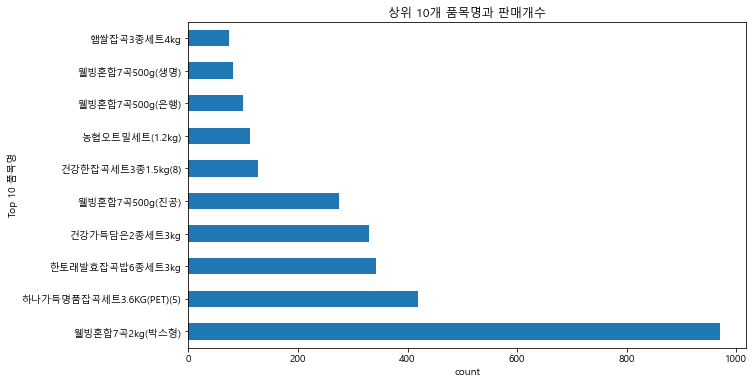

In [82]:
plt.figure(figsize=(10,6))
online_data['품목명'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 품목명')
plt.title('상위 10개 품목명과 판매개수')
plt.show()